In [ ]:
import numpy as np
from sympy import fwht
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Attaque par correlation

** Le principe de cet attaque est d'analyser la consommation electrique de plusieurs tentatives de deverouillage afin de déduire le code secret. **  

En effet la machine effectue un xor entre l'entrée de l'utilisateur et le code secret,  
il est raisonnable de penser qu'une correlation se cache entre le code secret et la consommation electrique.  

On a la consommation electrique de 256 tentatives code PIN où on mesure la consommation electrique à 40 000 instants.  

La transformée de Walsh nous permet de, a chaque instant, prédir le byte calculer par la machine.  

Il est possible que cet prediction soit absurde car la machine n'est pas entrain d'effectuer le calcule à cet instant.

On juge ainsi une predicition en evaluant la correlation entre la prediction et la consommation electrique.

*Cette attaque devient inefficace si on effectue un calcul bien qu'on sache que le code est erroné, rendant un ainsi la consommation électrique indépendante du code secret.*


In [ ]:
# fill correlation file

def popcount_zero(x):
    c = 0
    while x:
        x &= x - 1
        c += 1
    return c

f = open('correlation', 'a')

phi = []
for i in range(256):
    file = open("data_"+str(i)+".txt",'r')
    tmp = []
    for j in range(40000):
        tmp.append(int(file.readline()))
    phi.append(tmp)

#phi_t[file][temps]
phi_t = []
for i in range(40000):
    tmp = []
    for j in range(256):
        tmp.append(phi[j][i])
    phi_t.append(tmp)                     

#phi_walsh[temps][file]
phi_t_walsh = []
for i in range(40000):
    phi_t_walsh.append(fwht(phi_t[i]))        #walsh tranformation

for i in range(40000):
    k = 0
    for j in [1,2,4,8,16,32,64,128]:          #base of code space Ei
        if(phi_t_walsh[i][j] > 0):
            k+=j
    f = []
    for j in range(256):
        f.append(popcount_zero(k^j))          #xor
    r = numpy.corrcoef(f,phi_t[i])[0,1]       #check if there is a correlation between power consumption and the potential code
    #if r>0.5:
    #   print(k)
    f.write(r+' '+k)
f.close()

In [ ]:
df = pd.read_csv('correlation', sep = ' ', names=['correlation', 'code'])

In [ ]:
df.head(5)

,correlation,code
0,0.120337,224
1,0.122562,241
2,0.145335,135
3,0.182600,175
4,0.180791,24


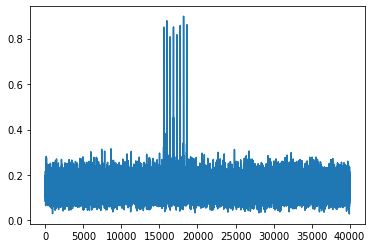

In [ ]:
_ = plt.plot(df['correlation'])

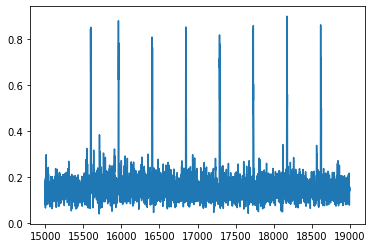

In [ ]:
_ = plt.plot(df['correlation'][15000:19000])

In [ ]:
for i in range(15000, 19000):
    if df['correlation'][i] > 0.5:
        print(df['code'][i])

50
50
50
50
50
50
50
50
55
55
55
55
55
55
49
49
49
49
49
49
49
56
56
56
56
56
50
50
50
50
50
50
50
50
50
56
56
56
56
56
56
49
49
49
49
49
49
49
49
49
56
56
56
56
56


In [ ]:
for i in range(15000, 19000):
    if df['correlation'][i] > 0.5 and df['code'][i] != df['code'][i-1]:
        print(df['code'][i])

50
55
49
56
50
56
49


In [ ]:
code = []
for i in range(len(df)):
    if df['correlation'][i] > 0.5 and not (df['code'][i] == df['code'][i-1] and df['correlation'][i-1] > 0.4):
        code.append(chr(df['code'][i]))
code

['2', '7', '1', '8', '2', '8', '1', '8']